In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:


def get_metrics(filename: str):
    total_hours = 0.0
    for line in open(filename):
        if 'Elapsed (wall clock) time' in line:
            hours, minutes, seconds = [piece.strip() for piece in line.split(":")[-3:]]
            total_hours = float(hours) if hours.isnumeric() else 0.0
            total_hours += float(minutes)/60 + float(seconds)/3600
        if 'Maximum resident set size (kbytes)' in line:
            max_ram_gb = int(line.split(":")[-1].strip()) / 1024 / 1024
    if not total_hours:
        return None
    return total_hours, max_ram_gb

In [51]:
from collections import defaultdict
import os

# Solver -> threads -> metrics
metrics_by_solver_and_threads = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

root_path = "/home/suhas/sherlogs/coral/recon"
for file_path, folders, filenames in os.walk(root_path):
    if not len(subpaths := file_path.split(root_path)[-1].split("/")) > 1:
        continue
    solver = subpaths[1]
    if len(subpaths) > 2:
        threads = int(subpaths[2])
    else:
        threads = "unknown"
    for filename in filenames:
        if not filename.endswith(".err"):
            continue
        simulation_idx = int(filename.split(".")[0])
        fqn = os.path.join(file_path, filename)
        if not (metrics := get_metrics(fqn)):
            # print(f"Unable to parse metrics for {fqn}")
            continue
        metrics_by_solver_and_threads[solver][threads][simulation_idx] = metrics
    # print(solver, subpaths, file_path, folders, filenames )

In [52]:


full_metrics_by_sim_idx = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

for solver, sims_by_threads in metrics_by_solver_and_threads.items():
    for threads, metrics_by_sim_idx in sims_by_threads.items():
        for sim_idx, metrics in metrics_by_sim_idx.items():
            # print(f"{solver} ({threads=}) sim#{sim_idx} hours:{metrics[0]:.2f} RAM:{metrics[1]:.2f}")
            full_metrics_by_sim_idx[sim_idx][solver][threads] = metrics
        # total_hours = sum([metrics[0] for metrics in metrics_by_sim_idx.values()])
        # max_ram_gb = max([metrics[1] for metrics in sims.values()])
        # print(f"{solver} {threads} {total_hours:.2f} {max_ram_gb:.2f}")

In [53]:
for sim_idx, metrics_by_solver in (sorted(full_metrics_by_sim_idx. items())):
    print(f"Simulation {sim_idx}")
    for solver, metrics_by_thread in metrics_by_solver.items():
        for threads, metrics in metrics_by_thread.items():
            print(f"{solver} ({threads=}) sim#{sim_idx} hours:{metrics[0]:.2f} RAM (GB):{metrics[1]:.2f}")



Simulation 1
scip (threads=1) sim#1 hours:5.18 RAM (GB):2.23
gurobi (threads=1) sim#1 hours:2.18 RAM (GB):1.42
gurobi (threads=4) sim#1 hours:2.18 RAM (GB):1.43
gurobi (threads=8) sim#1 hours:2.16 RAM (GB):1.91
gurobi (threads=16) sim#1 hours:2.12 RAM (GB):5.41
Simulation 2
scip (threads=1) sim#2 hours:4.22 RAM (GB):5.19
gurobi (threads=1) sim#2 hours:2.23 RAM (GB):1.63
gurobi (threads=4) sim#2 hours:2.14 RAM (GB):1.66
gurobi (threads=8) sim#2 hours:2.14 RAM (GB):3.19
gurobi (threads=16) sim#2 hours:2.15 RAM (GB):7.87
Simulation 3
scip (threads=1) sim#3 hours:5.21 RAM (GB):2.23
gurobi (threads=1) sim#3 hours:2.21 RAM (GB):2.22
gurobi (threads=4) sim#3 hours:0.17 RAM (GB):2.23
gurobi (threads=8) sim#3 hours:0.22 RAM (GB):2.22
gurobi (threads=16) sim#3 hours:0.29 RAM (GB):2.23
Simulation 4
scip (threads=1) sim#4 hours:0.18 RAM (GB):1.58
gurobi (threads=1) sim#4 hours:0.18 RAM (GB):1.58
gurobi (threads=4) sim#4 hours:0.11 RAM (GB):1.59
gurobi (threads=8) sim#4 hours:0.10 RAM (GB):1.58
gur

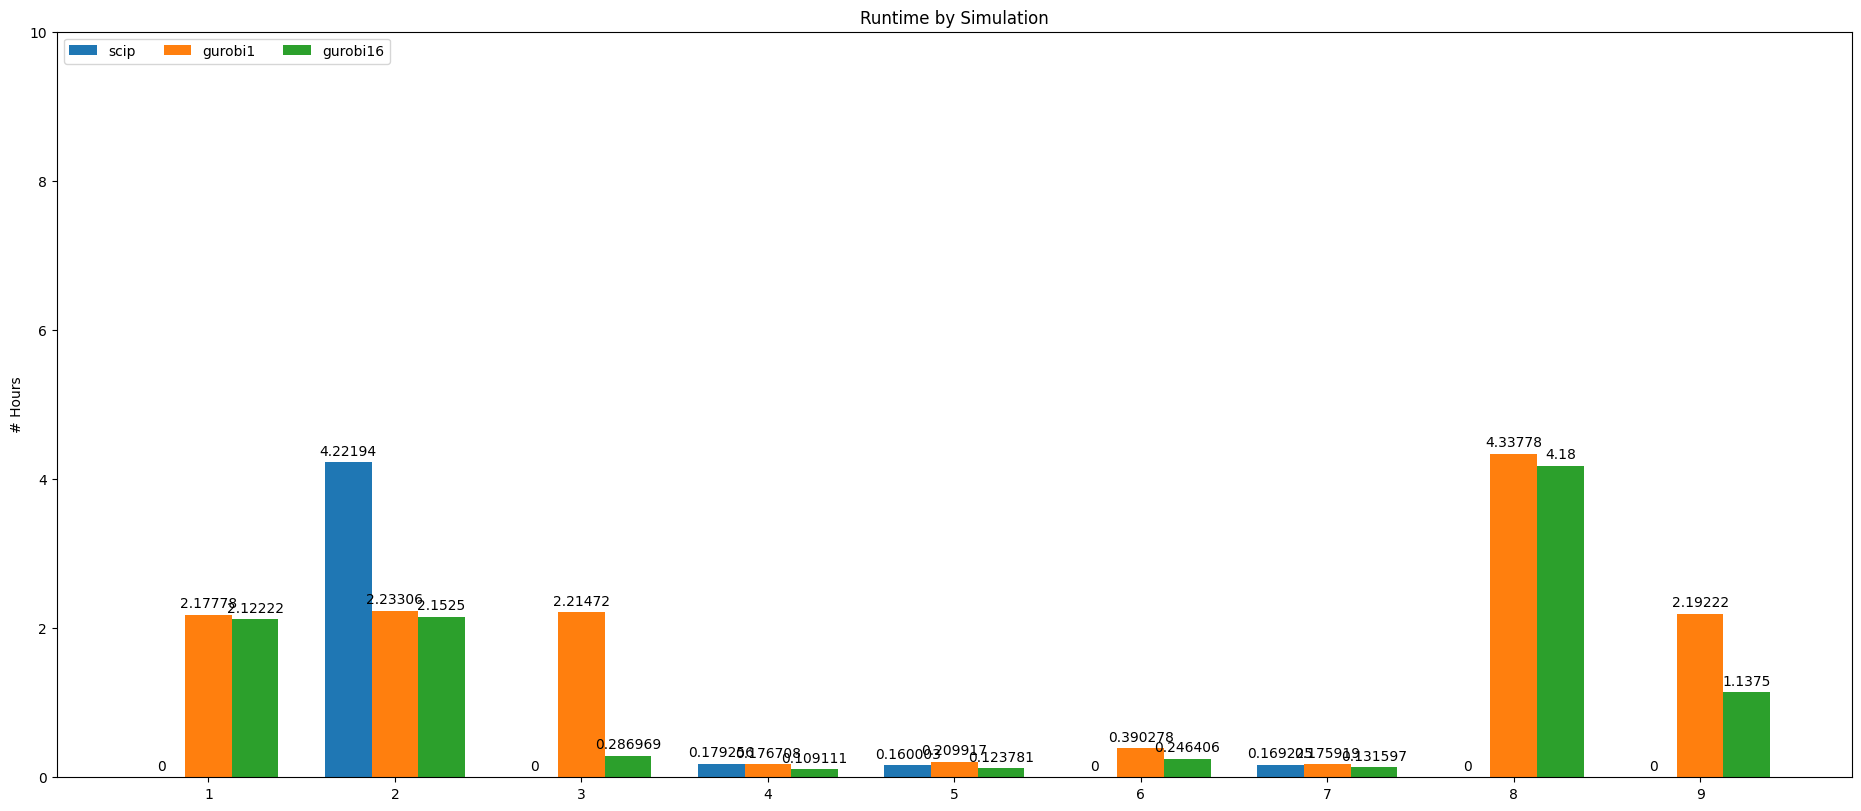

In [112]:
# Hours Plot
simulations = range(1,10)
scip = []
gurobi1 = []
gurobi16 = []
for i in simulations:
    if (scip_metrics := full_metrics_by_sim_idx[i].get("scip")):
        scip.append(scip_metrics[1][0] if (scip_metrics.get(1) and scip_metrics[1][0] < 5.0 )else 0)
    else:
        scip.append(0)
    if (gurobi_metrics := full_metrics_by_sim_idx[i].get("gurobi")):
        # print(gurobi_metrics)
        gurobi1.append(gurobi_metrics[1][0] if gurobi_metrics.get(1) else 0)
        gurobi16.append(gurobi_metrics[16][0] if gurobi_metrics.get(16) else 0)
    else:
        gurobi1.append(0)
        gurobi16.append(0)
data = {"scip": scip, "gurobi1": gurobi1, "gurobi16": gurobi16}

x = np.arange(len(simulations))  # the label locations
# width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(18.5, 8)

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# Hours')
ax.set_title('Runtime by Simulation')
ax.set_xticks(x + width, simulations)
ax.legend(loc='upper left', ncols=10)
ax.set_ylim(0, 10)

plt.savefig("output/hours/1-10.png")


In [58]:
scip_metrics[60]

{}

In [ ]:
x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

defaultdict(<function __main__.<lambda>()>, {})

In [98]:
import pandas as pd
gurobi_scores = pd.read_csv("~/sherlock/scores/gurobi_stats.csv",sep="\t")
scip_scores = pd.read_csv("~/sherlock/scores/scip_stats.csv",sep="\t")

In [45]:
scores.maximum_lcs_length.unique()

array([2157594, 1999989, 1726706, 1926097, 2181788, 2095366, 1999994,
       1999999, 1999998, 1988626, 1767740, 2509808, 1999990, 1969862,
       1969213, 2184486, 1732106, 2016828, 2599984, 1999997, 2721900,
       1504758, 1655523, 1160951,       0, 1565780, 1494939, 1010028,
       2071529, 1742463, 1918664, 1977677, 2275790, 1697921, 1999992,
       2411493, 1348038, 1999988, 1948007, 2176441, 1546304,  968833,
       2300508, 1845220, 2477404, 1520731, 2206326, 1864369, 1999995,
        972856,  978819, 1737287, 1821488, 1611619, 1805218, 2518651,
       1663083, 1185205, 1755102, 1248566, 1779133, 1620284, 1625030,
       1438272, 2459412, 1749770, 1633567, 1719891, 2192106, 1734043,
       1586133, 1629409])

In [16]:
fn = "sims/test50/gurobi/1/graphs/amplicon1_graph.txt"

In [22]:
import re
re.sub(r"graphs/amplicon(\d+)_graph.txt", r"cycles/amplicon\1_cycle.txt", fn)

'sims/test50/gurobi/1/cycles/amplicon1_cycle.txt'

In [23]:
a = "2+10-12-11-10-11+12+13+5+8+9+4-9+10+11"

In [32]:
segs = re.split("(\\+|\\-)",a)
new_segs = []
for i in range(len(segs)//2):
    new_segs.append(segs[2*i] + segs[2*i+1])
    # print(segs[2*i], segs[2*i+1])
print(new_segs)

['2+', '10-', '12-', '11-', '10-', '11+', '12+', '13+', '5+', '8+', '9+', '4-', '9+', '10+']


In [99]:
scip_scores

,Unnamed: 0,test_id,algorithm,amplicon,coverage,n_breakpoints_simulated,n_amplified_intervals,n_sequence_edges,n_breakpoint_edges,amplified_intervals_covered,...,total_reconstructed_breakpoint_edges,fragment_overlap_unweighted,reconstruction_length_ratio,cycle_triplets_correct,best_copy_number_ratio,top_three_copy_number_ratio,maximum_lcs_length,maximum_normalized_lcs_length,breakpoint_accuracy,breakpoint_class
0,0,test50,CoRAL,chromothripsis_bp10_amplicon2,250x,12,10,20,12,5,...,12,0.000000,0.000000,NaN,0.000000,0.0,0,0.000000,1.0,chromothripsis
1,1,test50,CoRAL,chromothripsis_bp1_amplicon2,100x,11,10,11,11,6,...,11,0.000000,0.000000,NaN,0.000000,0.0,0,0.000000,1.0,chromothripsis
2,2,test50,CoRAL,episomal_bp20_amplicon4,250x,9,1,21,9,2,...,9,0.000000,0.000000,NaN,0.000000,0.0,0,0.000000,1.0,episomal
3,3,test50,CoRAL,foldback_bp20_amplicon5,50x,6,1,21,6,1,...,6,0.000000,0.000000,NaN,0.000000,0.0,0,0.000000,1.0,foldback
4,4,test15,CoRAL,chromothripsis_bp3_amplicon1,50x,11,10,13,11,3,...,11,0.000000,0.000000,NaN,0.000000,0.0,0,0.000000,1.0,chromothripsis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,test20,CoRAL,foldback_bp10_amplicon4,100x,6,1,11,6,1,...,6,0.999993,0.000007,1.0000,0.803151,1.0,1661616,0.999993,1.0,foldback
125,125,test20,CoRAL,foldback_bp20_amplicon2,100x,9,1,21,9,1,...,9,0.999995,0.000005,0.3125,1.000000,1.0,1586133,0.758903,1.0,foldback
126,126,test27,CoRAL,chromothripsis_bp10_amplicon5,50x,13,10,20,13,4,...,13,0.999994,0.000006,1.0000,1.000000,1.0,1999988,0.774326,1.0,chromothripsis
127,127,test27,CoRAL,episomal_bp10_amplicon1,50x,8,1,11,8,1,...,8,0.999998,0.000002,1.0000,1.000000,1.0,1999992,0.999998,1.0,episomal


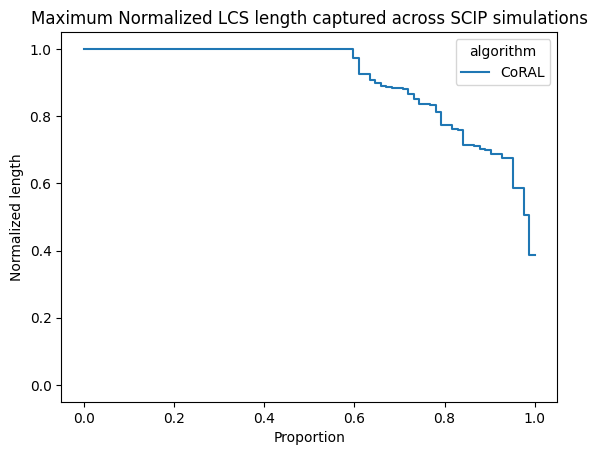

In [119]:
import seaborn as sns
sns.ecdfplot(data=scip_scores.loc[scip_scores.maximum_lcs_length > 0], y='maximum_normalized_lcs_length', hue='algorithm', complementary=True)
plt.title("Maximum Normalized LCS length captured across SCIP simulations")
plt.ylabel("Normalized length")
# plt.xlabel("")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.savefig("output/scip_lcs.png")
plt.show()

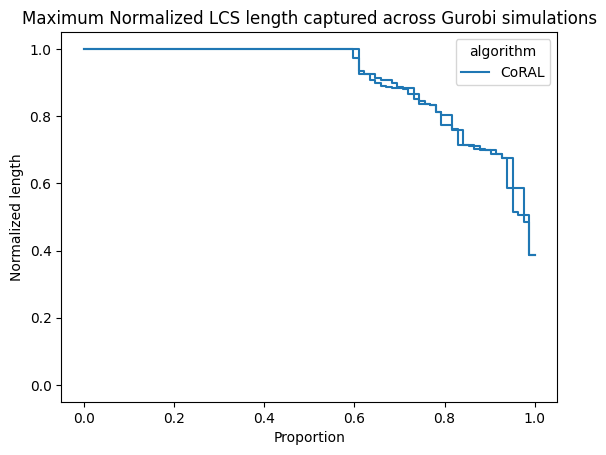

In [123]:
import seaborn as sns
scp_solved_idx = scip_scores.maximum_lcs_length > 0
sns.ecdfplot(data=gurobi_scores.loc[scp_solved_idx], y='maximum_normalized_lcs_length', hue='algorithm', complementary=True,)
sns.ecdfplot(data=scip_scores.loc[scp_solved_idx], y='maximum_normalized_lcs_length', hue='algorithm', complementary=True)
plt.title("Maximum Normalized LCS length captured across Gurobi simulations")
plt.ylabel("Normalized length")
# plt.xlabel("")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.savefig("output/gurobi_lcs.png")
plt.show()

In [1]:
import timeit